# 1. Introducción

En este cuaderno vamos a intentar encontrar un modelo óptimo para nustro estudio **GamePredRater**. Cuyo objetivo es predecir el rating que obtendrá un videojuego de acuerdo a sus características.

Para ello, vamos a probar con diferentes algoritmos que veremos a continuación.

# 2. Librerias

Cargamos las librerías que necesitaremos para la correcta ejecución de este cuaderno.

In [ ]:
# Carga de datos
import pandas as pd
import io
from google.colab import files

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Estimadores y selección de modelos
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

# Otros
import numpy as np    
from sklearn.metrics import mean_absolute_error, mean_squared_error


from scipy.stats import randint as sp_randint

# 3. Carga de datos

Cargamos los datasets.

In [ ]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# 4. Ejecución de algoritmos

Vamos a poner en marcha tres algoritmos: Decision Tree, Ramdom Forest y Boosting.

## Decision Tree

Un árbol de decisión dividirá nuestros datos en dos o más conjuntos homogéneos basados en la variable más significativa que existe en nuestro conjunto de datos, creando un árbol a través de las condiciones que se evalúan en esa variable.

En este caso, trabajaremos con un árbol de profundidad 5.

In [ ]:
def DecisionTree():     
    regressor = DecisionTreeRegressor(max_depth=5, random_state=0)
    regressor.fit(X_train,y_train)

    # Test
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Medidas de precisión del modelo')
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)

    # Plot
    xx = np.arange(0,len(y_test),1)
    plt.plot(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("DecisionTree")
    plt.show()

    return regressor

Medidas de precisión del modelo
MAE:  0.1360682519136137
MSE:  0.029887548332383947
RMSE:  0.17288015598206738


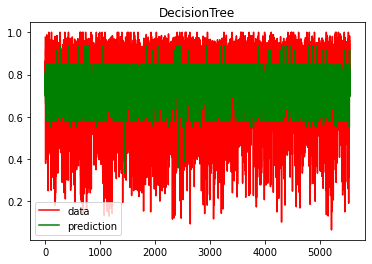

In [ ]:
model_DecisionTree = DecisionTree()

## Random Forest

Un Random Forest no es más que un conjunto de Decision Trees. Cada uno de estos devolverá un resultado, y el resultado final será la media de todos los resultados. 

Probaremos con 100 arboles con una máxima profundidad de 8.

In [ ]:
def RandomForest(X_train, X_test,y_train,y_test,n_e,m_depth):
    regressor = RandomForestRegressor(n_estimators= n_e, max_depth = m_depth, criterion='mae', random_state=0)
    regressor.fit(X_train, y_train.values.ravel())

    # Test
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Medidas de precisión del modelo')
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)

    # Plot
    xx = np.arange(0,len(y_test),1)
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("RandomForests Regressor")
    plt.show()
    
    return regressor

Medidas de precisión del modelo
MAE:  0.1271272507041679
MSE:  0.02774853491992711
RMSE:  0.16657891499204547


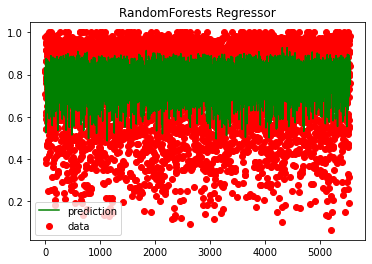

In [ ]:
model_RandomForest = RandomForest(X_train, X_test, y_train, y_test, 100, 8)

## Boosting

La idea principal de Boosting es intentar mejorar el rendimiento del modelo llamándolo repetidamente, con el objetivo de convertirse en un buen modelo predictor.

El objetivo de cada modelo es solucionar los errores del modelo anterior, para no volver a cometerlo y así terminar creando un modelo eficiente. 

In [ ]:
def Boosting(X_train, X_test):
    regressor = GradientBoostingRegressor(n_estimators= 100, max_depth = 5, criterion='mae', random_state=0)
    regressor.fit(X_train, y_train.values.ravel())

    # Test
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Medidas de precisión del modelo')
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)

    # Plot
    xx = np.arange(0,len(y_test),1)
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("GradientBoosting Regressor")
    plt.show()
    
    return regressor

Medidas de precisión del modelo
MAE:  0.12275697388546472
MSE:  0.026126786531047903
RMSE:  0.16163782518658157


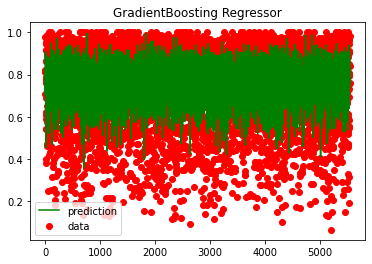

In [ ]:
model_Boosting = Boosting(X_train, X_test)

# 4. Optimización de modelos

Basándonos en las medidas de precisión, el mejor modelo de los tres anteriores es el producido por el algoritmo de Boosting. Por tanto, vamos a aplicarle una hiperparametrización para intentar encontrar la mejor combinación de parámetros que nos pueda aportar este algoritmo.

In [ ]:
# Variables que serán hiperparametrizadas
param = {"n_estimators": [16, 32, 64, 128, 256, 512, 1024, 2048],          # Number of trees in random forest
              "criterion": ['mse'],                                      # Function to measure the quality of a split
              "max_depth": [2, 4, 8, 12, 16, None],                             # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50),                           # Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50),                            # Minimum number of samples required at each leaf node
              "max_features": ['auto', 'sqrt', 'log2'],                         # Number of features to consider at every split
            }

In [ ]:
est = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator = est, param_distributions = param, n_iter = 50, cv = 6, verbose = 4, random_state=0, n_jobs = -1)

# Fit the random search model
rand_search.fit(X_train,y_train.values.ravel())

Fitting 6 folds for each of 50 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed: 116.0min


In [ ]:
rand_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=64, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
def GridRandomForest(X_train, X_test):
    regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None, max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=12, min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)
    regressor.fit(X_train, y_train.values.ravel())

    # Test
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Medidas de precisión del modelo')
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)

    # Plot
    xx = np.arange(0,len(y_test),1)
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("Random Forest Randomized Search Regressor")
    plt.show()
    
    return regressor

Medidas de precisión del modelo
MAE:  0.12561357649782964
MSE:  0.025556419945176195
RMSE:  0.15986375431965869


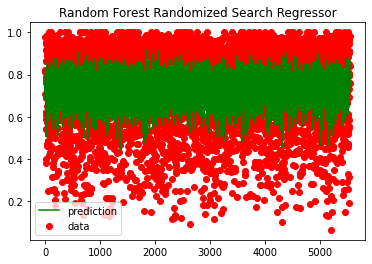

In [ ]:
model_RandomSearchForest = GridRandomForest(X_train, X_test)

La mejor combinación son 150 arboles de decisión con una máxima profundidad de 6. Calculamos su MAE.

# 5. Evaluación con un ejemplo

En este apartado, vamos a comprobar que tal funciona nuestro modelo, con una pequeña prueba con un único juego escogido al azar, dentro del dataset de train.

In [ ]:
import random
num_aleatorio = random.randrange(len(X_test))

In [ ]:
juego1 = np.array(X_test.iloc[num_aleatorio])
calificacion_juego1 = y_test.iloc[num_aleatorio]
juego1 = juego1.reshape(1, -1)
juego1

array([[2.15053763e-02, 2.28196721e-03, 7.13843516e-02, 0.00000000e+00,
        1.00000000e+00, 2.56000000e-04, 2.26681779e-03, 3.56379187e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.23778073e-02, 5.23757759e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.61166592e-02, 0.00000000e+00,
        3.38070142e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.19268727e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.34073130e-01,
        1.13062970e-01, 0.00000000e+00, 0.00000000e+00, 9.766561

In [ ]:
calificacion_pred = model_RandomSearchForest.predict(juego1)

In [ ]:
mae = mean_absolute_error(calificacion_juego1, calificacion_pred)
mse = mean_squared_error(calificacion_juego1, calificacion_pred)
rmse = np.sqrt(mse)

In [ ]:
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MAE: 0.032900359161017634
MSE: 0.001082433632923957
RMSE: 0.032900359161017634
